# Preprocessing

This notebook contains code to read in data from the Muse and break it into labelled chunks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.io

In [3]:
pd.__version__

u'0.20.3'

In [5]:
%matplotlib notebook

## Importing data

In [6]:
# def loadData(filename='...')
filename = 'data/sample/fakeData.mat'
# alldata = pd.read_csv("...")

In [7]:
data = scipy.io.loadmat(filename)
data.keys()

['__version__', '__header__', 'fakeBrains', '__globals__']

In [8]:
braindata = data['fakeBrains']

In [9]:
s = braindata[0,0]

In [10]:
s.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('stamps', 'O')])

In [11]:
labels = [x[0] for x in s['chanlocs']['labels'][0]]
print labels

[u'MUSE_LEFT_AUX', u'TP9', u'FP1', u'FP2', u'TP10', u'MUSE_RIGHT_AUX']


In [12]:
print s['filepath']
print s['pnts']
print s['event']

[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[201984]]
[[ (array([u'100'],
      dtype='<U3'), array([[9117]], dtype=uint16), array([[1]], dtype=uint8))
  (array([u'100'],
      dtype='<U3'), array([[ 9130.44618591]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 24349.94160625]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 30127.01303804]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 41971.39714456]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 50368.22860394]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 68265.19007323]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 77559.87943857]]), array([[1]], dtype=uint8))
  (array([u'149'],
      dtype='<U3'), array([[ 88063.51561899]]), array([[1]], dtype=uint8))
  (array([u'151'],
      dtype='<U3'), array([[ 96785.81987019]]), array([[1]], dtype=uint8))


In [13]:
for typ, time, _ in s['event'][0]:
    typ = typ[0]
    time = time[0,0]
    print typ, time

100 9117
100 9130.44618591
149 24349.9416063
151 30127.013038
149 41971.3971446
151 50368.2286039
149 68265.1900732
151 77559.8794386
149 88063.515619
151 96785.8198702
149 106708.093796
151 116177.541049
149 120340.76932
151 126367.069909
149 134338.873599
151 143741.557395
149 152662.031521
151 156646.279977
149 165344.936488
151 172288.03004
149 177466.916224
151 183827.627696
149 188185.909168
151 192532.449724
0 192907.457102
200 193058.946545
200 197126.058427


<IPython.core.display.Javascript object>


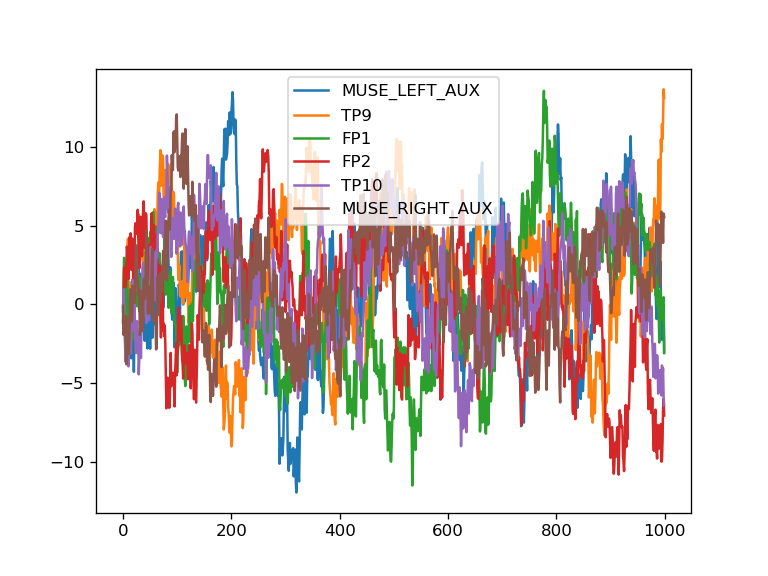

In [14]:
plt.plot(np.transpose(s['data'])[1:10000:10,:])
plt.legend(labels)d

In [15]:
s['chanlocs']['labels']

array([[array([u'MUSE_LEFT_AUX'],
      dtype='<U13'),
        array([u'TP9'],
      dtype='<U3'),
        array([u'FP1'],
      dtype='<U3'),
        array([u'FP2'],
      dtype='<U3'),
        array([u'TP10'],
      dtype='<U4'),
        array([u'MUSE_RIGHT_AUX'],
      dtype='<U14')]], dtype=object)

In [62]:
df = pd.DataFrame(np.transpose(s['data']), columns=labels,)

In [63]:
df.tail()

,MUSE_LEFT_AUX,TP9,FP1,FP2,TP10,MUSE_RIGHT_AUX
201979,0.983068,3.355291,-1.087860,-2.648987,1.296883,-6.010253
201980,0.818457,3.449538,-2.344299,-2.997200,0.374380,-5.071684
201981,0.903999,3.794061,-1.696822,-3.238515,0.541576,-5.046043
201982,1.071754,3.468834,-1.753024,-3.166986,-0.444266,-4.428961
201983,0.583980,3.367642,-2.243076,-3.550041,0.707819,-4.661539


In [103]:
df_freq = np.fft.fft(df['FP1'])

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

<IPython.core.display.Javascript object>


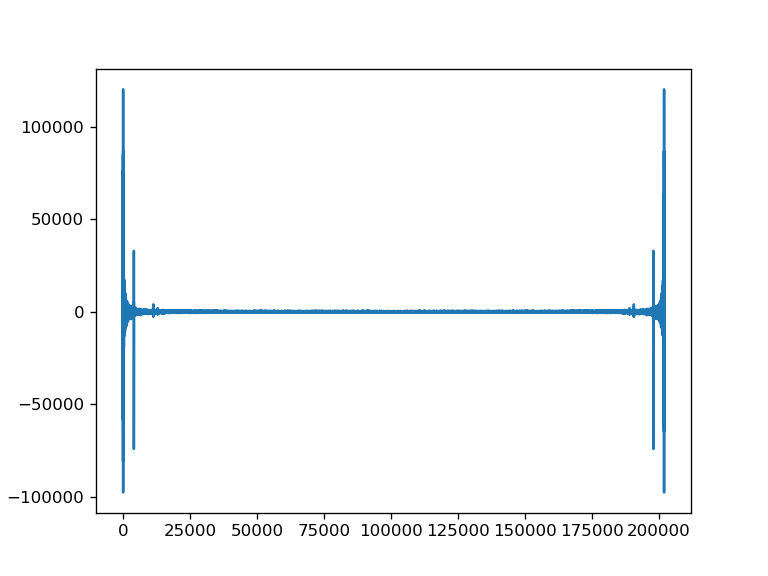

In [104]:
plt.plot(df_freq)
plt.show()